In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [37]:
df=pd.read_csv("secom_lr.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [38]:
df

,Pass/Fail,v0,v10,v100,v101,v102,v107,v108,v112,v113,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
0,0,0.212406,-0.330435,0.50,1.0,1.962264,-2.545642,3.241076,0.096448,-0.029197,...,-0.278261,-1.666667,-0.171053,0.911458,-0.304514,-3.521505,0.038462,0.5,0.978938,-0.421141
1,0,0.933964,-1.321739,-1.00,-2.0,-1.088534,0.796287,-0.767726,0.486926,-0.284672,...,-0.550725,0.171171,-0.062500,0.041667,-0.860221,1.563441,0.076923,-2.5,-2.303978,-0.265101
2,0,-0.257246,-0.321739,-0.50,0.0,-1.011611,-0.498195,-1.038631,0.100148,0.729927,...,-0.067633,0.261261,0.213816,-0.578125,-1.282571,0.748387,-0.730769,-0.5,0.043601,-0.327181
3,0,0.226982,-0.660870,1.00,-1.5,1.013062,-0.824136,-1.877751,-0.412926,-0.291971,...,0.948792,0.243243,-0.210526,-0.093750,0.414045,0.480645,0.038462,-0.5,-1.651435,-0.280201
4,0,-0.729791,0.443478,-0.50,-0.5,0.387518,-2.682826,1.410269,0.198816,-0.270073,...,-0.568116,0.117117,0.677632,0.937500,-1.987431,-1.216129,-0.076923,-1.0,-0.551792,-0.703020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.50,-1.0,0.767779,-1.112945,0.109535,0.054267,-0.956204,...,-0.786473,0.072072,-0.226974,-0.421875,0.733834,-2.010753,0.423077,-1.0,-1.138071,-0.577181
1563,1,0.457747,-0.539130,2.50,-1.0,-0.635704,-0.846828,-0.307090,0.537987,0.583942,...,0.879227,-0.090090,0.763158,-0.125000,-0.423207,0.123656,0.461538,0.5,-0.863407,-0.671141
1564,1,-0.667594,-0.373913,0.00,-0.5,-0.341074,-0.157813,0.114425,-0.420079,0.153285,...,0.206763,0.180180,-0.575658,-0.072917,0.094760,1.626882,-0.423077,-0.5,-0.799852,0.500000
1565,1,1.795160,-0.530435,0.75,0.0,0.557329,-1.129448,1.013203,0.979033,-0.532847,...,0.805797,0.153153,-0.082303,-1.380208,0.000000,-1.689247,-0.653846,0.0,-0.178347,0.686242


In [39]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

In [41]:
from sklearn.model_selection import train_test_split

## SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1096, 226) (1096,)

오버샘플링 후 : (2046, 226) (2046,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1023
0    1023
dtype: int64


Class=0, n=1023 (65.284%)
Class=1, n=73 (4.659%)


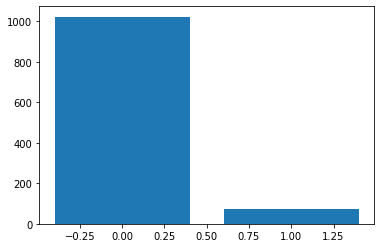

In [43]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1023 (65.284%)
Class=1, n=1023 (65.284%)


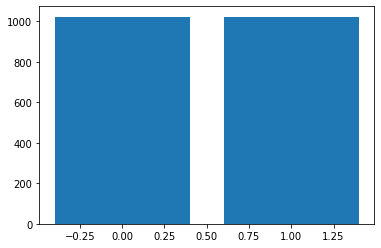

In [44]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [45]:
x_train_over = pd.DataFrame(x_train_over)
y_train_over=pd.DataFrame(y_train_over)

In [46]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty" : ["l2", "l1"],
}

grid_search = GridSearchCV(log, param_grid, cv=5)

grid_search.fit(x_train_over, y_train_over.values.ravel())
print('최적 하이퍼 파라미터: ', grid_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))

최적 하이퍼 파라미터:  {'C': 0.1, 'penalty': 'l2'}
최고 예측 정확도: 0.7640


In [47]:
evals = [(X_test, y_test)]
logistic = LogisticRegression(**grid_search.best_params_)
logistic.fit(x_train_over, y_train_over)

preds = logistic.predict(X_test) 

In [48]:
X_test

,v0,v10,v100,v101,v102,v107,v108,v112,v113,v115,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
955,-0.677274,0.095652,0.00,-0.5,-0.371553,0.267148,-0.295355,-0.615195,1.291971,0.124013,...,0.264734,0.387387,-0.634868,-0.515625,-0.022590,0.211828,0.769231,-0.5,-0.399310,-0.265101
1174,-0.324562,-0.939130,0.25,0.0,-0.124819,-0.958226,0.066504,-0.510607,1.153285,-0.675701,...,0.655072,-1.693694,-0.493421,-1.005208,-0.429228,-0.759140,-0.153846,0.0,0.056657,-1.233221
821,2.064979,1.269565,0.25,0.5,-0.786647,-0.386797,-0.238631,-0.467193,-0.167883,0.524428,...,-0.558454,-0.036036,0.641447,-0.062500,0.585373,0.123656,0.615385,0.5,0.303239,0.171141
1095,-0.802337,0.513043,-1.00,1.5,-0.502177,0.340382,0.792176,-114.527380,0.948905,0.471287,...,-0.183575,0.135135,-0.578947,-0.791667,0.558395,0.647312,0.538462,0.5,1.398694,-0.109060
35,0.104812,0.765217,-0.75,0.5,-0.590711,0.566271,0.410758,0.253823,-0.832117,-1.381983,...,-0.077295,-1.378378,0.963816,0.494792,-0.483813,0.634409,-0.538462,-0.5,0.506220,-0.374161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1.844451,-1.052174,-0.50,-0.5,-0.044993,0.009283,0.299267,0.971633,1.532847,0.762098,...,0.966184,0.243243,-0.072368,0.937500,0.429170,0.202151,-0.500000,-0.5,-0.348565,-0.203020
641,0.378748,-0.704348,-0.25,0.5,0.081277,-0.027849,-0.346210,0.387519,-0.255474,0.059087,...,1.122705,0.270270,-1.131579,-2.390625,0.140576,0.177419,-0.153846,0.0,0.297081,0.483221
216,-2.120834,-0.200000,0.75,2.0,-0.802612,-0.247550,-0.152567,0.416626,-1.131387,-0.039879,...,0.512077,-0.036036,0.559211,0.302083,-0.338246,1.218280,-1.269231,2.0,2.380096,-0.436242
1062,-0.443282,0.295652,0.00,0.0,0.002903,0.000000,0.115403,0.331278,0.927007,0.726130,...,1.012560,0.189189,-0.848684,1.026042,0.524956,-0.001075,-0.461538,0.0,0.000000,0.000000


In [49]:
print('test accuracy : ', grid_search.score(X_test, y_test))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.6518046709129511
parameters :  {'C': 0.1, 'penalty': 'l2'}


In [50]:
print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(x_train_over, y_train_over))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(X_test, y_test))

학습용 데이터셋 정확도 : 0.74
검증용 데이터셋 정확도 : 0.65


In [51]:
from sklearn.metrics import classification_report
y_pred= grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78       440
           1       0.11      0.58      0.18        31

    accuracy                           0.65       471
   macro avg       0.53      0.62      0.48       471
weighted avg       0.90      0.65      0.74       471



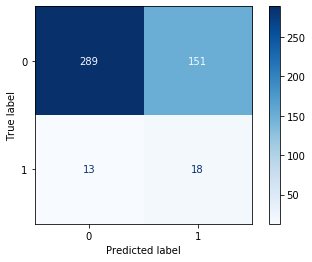

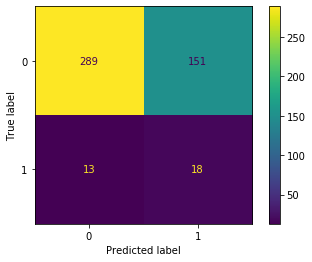

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds, labels=logistic.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[289 151]
 [ 13  18]]
trainset 정확도:  0.7360703812316716
testset 정확도:  0.6518046709129511
accuracy=  0.6518046709129511
precision=  0.10650887573964497
recall=  0.5806451612903226
f1 score=  0.18
교차 검증=  0.9044568868980963
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       440
           1       0.11      0.58      0.18        31

    accuracy                           0.65       471
   macro avg       0.53      0.62      0.48       471
weighted avg       0.90      0.65      0.74       471



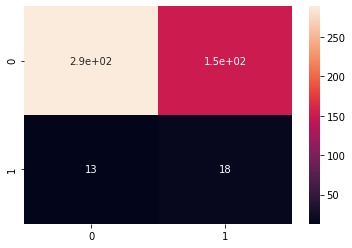

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',logistic.score(x_train_over,y_train_over)) #trainset 정확도
print('testset 정확도: ',logistic.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(logistic,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

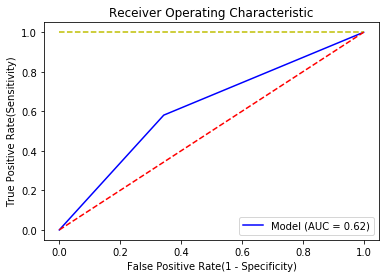

In [54]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, pred_c)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

#roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
#roc_auc = metrics.roc_auc_score(y1_test,pred_c)
roc_auc = metrics.roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [55]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1023, 1: 73})
Resampled dataset shape Counter({0: 1023, 1: 1003})
오버샘플링 전 : (1096, 226) (1096,)

오버샘플링 후 : (2026, 226) (2026,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1003
dtype: int64


In [56]:
X_res = pd.DataFrame(X_res)
y_res=pd.DataFrame(y_res)

In [57]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty" : ["l2", "l1"],
}

grid_search = GridSearchCV(log, param_grid, cv=5)

grid_search.fit(X_res, y_res.values.ravel())
print('최적 하이퍼 파라미터: ', grid_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))

최적 하이퍼 파라미터:  {'C': 0.1, 'penalty': 'l2'}
최고 예측 정확도: 0.6876


In [58]:
evals = [(X_test, y_test)]
logistic = LogisticRegression(**grid_search.best_params_)
logistic.fit(X_res, y_res)

preds = logistic.predict(X_test) 

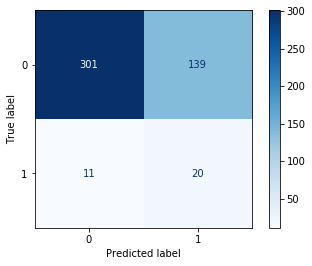

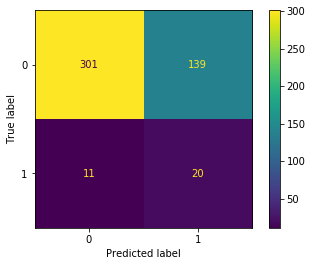

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds, labels=logistic.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

confusion matrix=
 [[301 139]
 [ 11  20]]
trainset 정확도:  0.7423494570582428
testset 정확도:  0.6815286624203821
accuracy=  0.6815286624203821
accuracy=  0.6815286624203821
precision=  0.12578616352201258
recall=  0.6451612903225806
f1 score=  0.2105263157894737
교차 검증=  0.9044568868980963
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       440
           1       0.13      0.65      0.21        31

    accuracy                           0.68       471
   macro avg       0.55      0.66      0.51       471
weighted avg       0.91      0.68      0.76       471



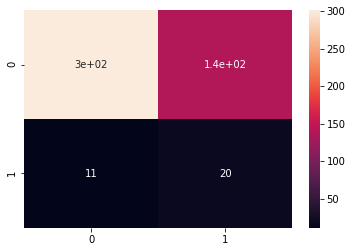

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
print('confusion matrix=\n',confusion_matrix(y_true=y_test,y_pred=preds))
print('trainset 정확도: ',logistic.score(X_res,y_res)) #trainset 정확도
print('testset 정확도: ',logistic.score(X_test,y_test)) #testset 정확도
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('accuracy= ',accuracy_score(y_true=y_test,y_pred=preds))
print('precision= ',precision_score(y_true=y_test,y_pred=preds))
print('recall= ',recall_score(y_true=y_test,y_pred=preds))
print('f1 score= ',f1_score(y_true=y_test,y_pred=preds))
print('교차 검증= ',cross_val_score(logistic,X_test,y_test).mean())
print(classification_report(y_test,preds))
heat=pd.DataFrame(confusion_matrix(y_test,preds))
sns.heatmap(heat,annot=True)

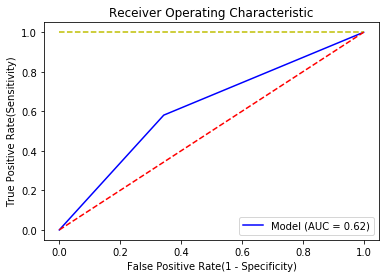

In [65]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, pred_c)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

#roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
#roc_auc = metrics.roc_auc_score(y1_test,pred_c)
roc_auc = metrics.roc_auc_score(y_test,y_pred)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [61]:
print('test accuracy : ', grid_search.score(X_test, y_test))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.6815286624203821
parameters :  {'C': 0.1, 'penalty': 'l2'}


In [62]:
print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(X_res, y_res))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(X_test, y_test))

학습용 데이터셋 정확도 : 0.74
검증용 데이터셋 정확도 : 0.68
